In [7]:
# importing modules and packages
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from io_utils import *
from plotting_utils import *
from analysis_utils import * 
from pathlib import Path
from sklearn.decomposition import PCA

# Load data into dictionary
with open('../data/full_traces.pickle', 'rb') as handle:
    dict = pickle.load(handle)

# possible ids for mice
subject_ids = [3095,3096,3097,4013,4014,4015,4016]

In [2]:
print(dict.keys())

dict_keys(['3095_d1_balbc_t1', '3095_d1_balbc_t2', '3095_d1_balbc_t3', '3095_d2_balbc_t1', '3095_d2_balbc_t2', '3095_d2_balbc_t3', '3095_d3_balbc_t1', '3095_d3_balbc_t2', '3095_d3_balbc_t3', '3095_d4_balbc_t1', '3095_d4_balbc_t2', '3095_d4_balbc_t3', '3095_d5_balbc_t1', '3095_d5_balbc_t2', '3095_d5_balbc_t3', '3095_d6_balbc_t1', '3095_d6_balbc_t2', '3095_d6_balbc_t3', '3095_d7_balbc_t1', '3095_d7_balbc_t2', '3095_d7_balbc_t3', '3095_d8_balbc_t1', '3095_d8_balbc_t2', '3095_d8_balbc_t3', '3095_d9_mCD1_t1', '3095_d9_mCD1_t2', '3095_d9_mCD1_t3', '3096_d1_balbc_t1', '3096_d1_balbc_t2', '3096_d1_balbc_t3', '3096_d2_balbc_t1', '3096_d2_balbc_t2', '3096_d2_balbc_t3', '3096_d3_balbc_t1', '3096_d3_balbc_t2', '3096_d3_balbc_t3', '3096_d4_balbc_t1', '3096_d4_balbc_t2', '3096_d4_balbc_t3', '3096_d5_balbc_t1', '3096_d5_balbc_t2', '3096_d5_balbc_t3', '3096_d6_balbc_t1', '3096_d6_balbc_t2', '3096_d6_balbc_t3', '3096_d7_balbc_t1', '3096_d7_balbc_t2', '3096_d7_balbc_t3', '3096_d8_balbc_t1', '3096_d8_bal

In [4]:
for mouseId in subject_ids:
    print(mouseId)
    print(len(dict[f'{mouseId}_d3_balbc_t1'].columns.tolist()))

3095
17
3096
14
3097
15
4013
15
4014
21
4015
23
4016
22


In [2]:
print(check_exist(mouseId='all',path=None))

(False, PosixPath('/Users/lencacuturela/Desktop/Research/github/Falkner_Multi-region_Aggression/data/all.csv'))


In [2]:
load_and_wrangle(mouseId='all', path=None, overwrite=False)


,index,subject,other,day,trial,PrL (E),PrL (I),vLS (E),vLS (I),POA (E),...,VMH (I),PAG (E),PMv (E),PMv (I),LHb (E),PA (E),PA (I),NAc (DA),unsupervised labels,supervised labels
0,0,3095,balb,1,1,0.681607,0.894658,-0.888269,-0.843799,-0.34011,...,-0.558806,NaN,NaN,NaN,NaN,NaN,NaN,-1.871317,1,0
1,1,3095,balb,1,1,0.599326,0.957647,-0.946083,-0.881617,-0.43045,...,-0.547735,NaN,NaN,NaN,NaN,NaN,NaN,-1.949758,1,0
2,2,3095,balb,1,1,0.529126,1.051173,-0.994299,-0.907692,-0.535689,...,-0.536162,NaN,NaN,NaN,NaN,NaN,NaN,-2.023673,3,0
3,3,3095,balb,1,1,0.477263,1.178564,-1.027632,-0.918032,-0.639095,...,-0.522479,NaN,NaN,NaN,NaN,NaN,NaN,-2.087047,1,0
4,4,3095,balb,1,1,0.450483,1.342303,-1.04039,-0.908681,-0.720142,...,-0.50484,NaN,NaN,NaN,NaN,NaN,NaN,-2.133982,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807492,9245,4016,mCD1,9,3,-0.579453,-0.78478,-0.113112,-0.454274,-0.761921,...,-0.960957,NaN,-0.248305,-1.052049,1.500971,-0.888567,-1.396829,-0.795804,4,0
3807493,9246,4016,mCD1,9,3,-0.566121,-0.629928,-0.08884,-0.400871,-0.741517,...,-0.977945,NaN,-0.244916,-1.025833,1.781089,-0.922451,-1.351286,-0.688127,4,0
3807494,9247,4016,mCD1,9,3,-0.562356,-0.412961,-0.020877,-0.369679,-0.702065,...,-1.003387,NaN,-0.233609,-0.940923,2.136928,-0.949573,-1.286938,-0.579722,4,0
3807495,9248,4016,mCD1,9,3,-0.599589,-0.117326,0.099659,-0.401065,-0.657963,...,-1.037981,NaN,-0.211399,-0.761976,2.576618,-0.988582,-1.198751,-0.548178,4,0


In [2]:
behaviorDistributions(mouseId='all',path=None,type='unsupervised')

ValueError: invalid literal for int() with base 10: 'all'

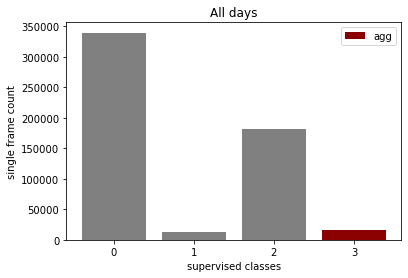

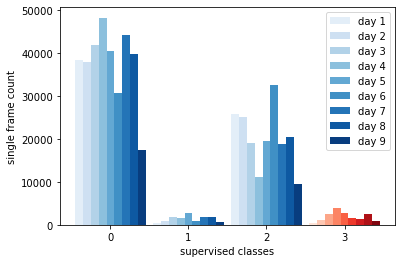

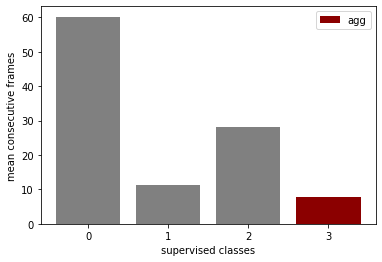

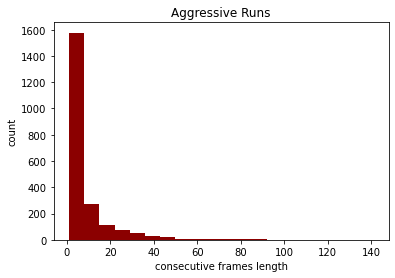

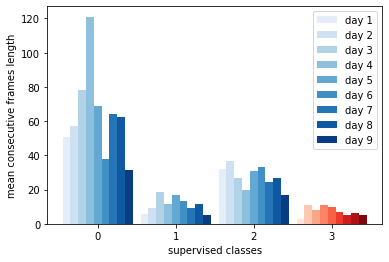

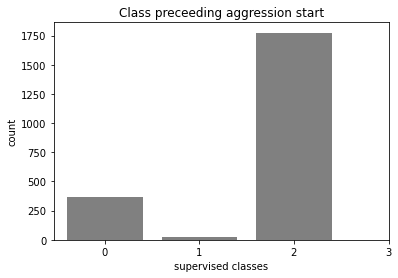

In [3]:
behaviorDistributions(mouseId=3095,path=None,type='supervised')

In [100]:
for id in subject_ids:
    load_and_wrangle(mouseId=id, path=None, overwrite=True)

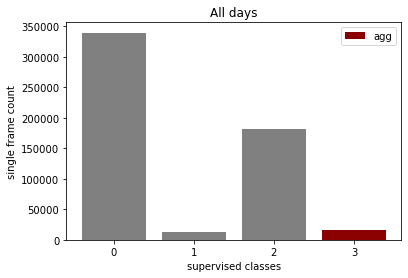

In [5]:
cmapB = mpl.cm.Blues(np.linspace(0,1,20))
cmapR = mpl.cm.Reds(np.linspace(0,1,20))
def singleFrameBehavioralDistribution(mouseId, path=None, daysType='all',labeltype='unsupervised'):
    """
    plotting single frame distribution
    params:
    -------
    mouse_id: int or str
        load id of subject mouse or 'all' for all mice together
    type: str
        'supervised' or 'unsupervised' or 'raw' - related to class labels to look at
    
    returns
    -------
    
    """
    # loading path on my laptop as default
    path = Path("/Users/lencacuturela/Desktop/Research/github/Falkner_Multi-region_Aggression/data") if path is None else Path(path)
    
    # checking that particular mouse_id is a valid option
    if(mouseId!='all'):
        if(int(mouseId) not in subject_ids):
            raise Exception('Mouse id can only be "all" or in ', subject_ids)

    # checking that type of labels is a valid option
    if (labeltype not in ['raw','supervised','unsupervised']):
        raise Exception('Label type can only be in', ['raw','supervised','unsupervised'])

    # checking that type of day arranging is a valid option
    if (daysType not in ['all days','per day']):
        raise Exception('Dyas type can only be in', ['all days','per day'])

    # info about which class is aggressive behavior
    if(labeltype == 'unsupervised'):
        aggClass = 2
        index_aggClass = 1 # because unsupervised start from 1
    elif(labeltype == 'supervised'):
        aggClass = 3 
        index_aggClass = 3 # because unsupervised start from 0

    # loading data
    df = load_and_wrangle(mouseId=mouseId, path=path, overwrite=False)

    # getting possible classes list
    classes = df[f'{labeltype} labels'].unique()
    classes.sort()

    if (daysType == 'all days'):
        # plotting distribution of classes across all days 
        plt.title("All days")
        plt.bar(classes,df[f'{labeltype} labels'].value_counts()[classes],color='gray')
        plt.bar(aggClass,df[f'{labeltype} labels'].value_counts()[aggClass],color='darkred',label='agg') # coloring aggression red
        plt.ylabel('single frame count')
        plt.xlabel(f'{labeltype} classes')
        plt.xticks(classes)
        plt.legend()
        plt.show()
    elif (daysType == 'per day'):
        # plotting dsitribution of classes for each day
        days = df['day'].unique()
        N = 3
        ind = np.arange(0,len(classes)) 
        width = 0.1
        for day in days:
            temp = df[df['day']==day]
            plt.bar(ind + width*(day-1), temp[f'{labeltype} labels'].value_counts()[classes], width, color=cmapB[day*2],label='day '+str(day))
            plt.bar(ind[index_aggClass] + width*(day-1), temp[f'{labeltype} labels'].value_counts()[aggClass], width, color=cmapR[day*2])
        plt.xlabel(f'{labeltype} classes')
        plt.xticks(ticks = ind + width*4,labels = classes)
        plt.ylabel('single frame count')
        plt.legend()
        plt.show()

singleFrameBehavioralDistribution(mouseId=3095, path=None, daysType='all days',labeltype='supervised')

In [8]:
PCAfunction(mouseId=3095, path=None, type=None)

Variance for each brain region
[0.14779717 0.04421218 0.08908049 0.03551362 0.16945907 0.07587813
 0.09675992 0.06006238 0.23102562 0.01704771 0.27294888 0.12655844
 0.30613906 0.05618241 0.09706614]


NameError: name 'PCA' is not defined